# Preprocesamientos básicos y representación vectorial Bag-of-words aplicados al análisis de sentimientos

## 1. ¿Qué es el lenguaje humano?

- Es un proceso de __comunicación__ entre humanos basado sobre un sistema complejo de signos

- Es un proceso de __percepción__ del mundo 

<i>¿Es posible pensar el mundo fuera del lenguaje? Ver concepto de <u>neolengua</u> de George Orwell en la novela 1984, quién puede manipular el lenguaje, puede manipular los humanos.</i>

- El lenguaje humano puede ser __verbal__ o __no verbal__

- El lenguaje verbal puede ser __oral__ o __escrito__

- Los humanos utilizan el lenguaje para cumplir 6 grandes tipos de función:
    1. _expresar su subjetividad o relaciones de poder_ (opiniones, emociones, creencias, etc.). Ej: "¡Me gusta la música!", "soy mejor que tú", etc.
    1. _solicitar que el interlocutor exprese su subjetividad_. Ej: "¿Qué piensas?", "¿te "gusta el deporte?", etc.
    1. _describir el mundo_. Ej: "Hay una mesa y 4 sillas", etc.
    1. _activar o mantener la comunicación_. Ej: "Hola", "Allo", "mmm", "eeeh"
    1. _ponerse de acuerdo sobre el sentido de un signo_. Ej: "Hace frio significa que la temperatura es bajo 10°c"
    1. _comunicar por el placer de comunicar_. Ej: poesia, juegos de palabras, bromas lingúïsticas, etc.
    

- En conclusión, el lenguaje humano siempre se inscribe en una __situación de comunicación__, revela __explicatamente__ o __implicitamente__ el objetivo de comunicacion un locutor, dentro de un contexto particular. 

Ejemplo: <code>"¿Viste como llueve?"</code>

Tal vez quiere decir en realidad: "¡deberías tomar tu paragua!"

- El lenguaje humano tiene distinto nivel de interpretación:
    - nivel __lexico-semántico__ : significado las palabras utilizadas.
    - nivel __pragmático-discursivo__ : significado de estas palabras en su contexto.

<code>"Hemos realizados intervenciones quirúrgicas en afganistán"</code>

Busca significar que las intervenciones fueron las más limpias y precisas posibles, pero tambien busca ocultar que se trata de bombardeos y de violencia.
       

## 2. ¿Qué el Tratamiento Automático del Lenguaje (o _NLP_)?

- Es una sub-disciplina de la Informática y de la Inteligencia Artificial que busca dotar los computadores de capacidad para entender, traducir y generar lenguaje humano a través de algoritmos y datos.

- Es una disciplina antigua pero creciente dado el desarrollo de la comunicación en Internet y el desarrollo de las técnicas de Machine Learning/Deep Learning.

- Problemas particulares del TAL en comparación con otras areas: __datos no estructurados__, __muchas(!!!) ambiguedades en los datos__, __problemas de grandes dimensiones__ (muchas variables posibles).

- Tareas clásicas: Traducción Automática, Question-Answering, Análisis de opiniones y sentimientos, Extracción de información, Análisis del discurso, etc.

- Tareas clásicas para el lenguaje oral: reconocimiento de las palabras, reconocimiento del locutor, etc.

- Tarea para el lenguaje no verbal: reconocimiento des las emociones, reconocimiento de gestos, etc.

## 3. Preprocesamientos básicos con spaCy

### 3.1 Tokenización, Stop-Words y Lematización

Cargaremos la librería de NLP spaCy (https://spacy.io/) y los modelos para procesar textos en español.

<code>pip3 install -U spacy</code>

<code>python3 -m spacy download es_core_news_sm</code>

In [1]:
import spacy

nlp = spacy.load("es_core_news_sm")

In [2]:
doc = nlp(u"Donald Trump es el presidente de Estados Unidos.")

<img src="pipeline.png"></img>

In [3]:
for token in doc:
    print(token.text, token.is_stop, token.lemma_)
    #Stop word: "palabras gramaticales que no llevan un sentido importante"

Donald False Donald
Trump False Trump
es True ser
el True el
presidente False presidente
de True de
Estados True Estados
Unidos False Unidos
. False .


El concepto de 'stop words' no tiene una definición objetiva. Una palabra 'stop words' depende mucho del caso de uso. Habitualmente se trata de una lista de palabras gramaticales tales como "es", "el", "la", "quiere", etc.

In [4]:
my_stop_words = [u'presidente']
for stopword in my_stop_words:
    lexeme = nlp.vocab[stopword]
    lexeme.is_stop = True
    
my_non_stop_words = [u'Estados']
for nonstopword in my_non_stop_words:
    lexeme = nlp.vocab[nonstopword]
    lexeme.is_stop = False

In [5]:
for token in doc:
    print(token.text, token.is_stop, token.lemma_)

Donald False Donald
Trump False Trump
es True ser
el True el
presidente True presidente
de True de
Estados False Estados
Unidos False Unidos
. False .


### 3.2 Clasificación de la categoría gramatical de las palabras (Part Of Speach tagging)

In [6]:
for token in doc:
    print(token.text, token.pos_)

Donald PROPN
Trump PROPN
es AUX
el DET
presidente NOUN
de ADP
Estados PROPN
Unidos PROPN
. PUNCT


### 3.3 Reconocimiento de los nombres de entidades (NER)

In [4]:
doc = nlp(u'Amazon tiene oficinas en todos los paises de America del Sur.')

for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

Amazon 0 6 PER
America del Sur 45 60 LOC


Por defecto, spaCy utiliza define varios tipos de entidades entre los cuales:
- PERSON: personas
- ORG: organizaciones, empresas, instituciones, etc.
- GPE: paises, ciudades, regiones.
- LOC: lugares geografícos que no son paises, ciudades o regiones.
- PRODUCT: productos
- EVENT: eventos

In [14]:
from spacy import displacy

displacy.render(doc, style="ent", jupyter=True)

Otros preprocesamientos posibles en el paquete spaCy: https://spacy.io/usage/linguistic-features
- Dependency parsing
- Sentence segmentation
- Rule-based matching

## 4. Representación vectorial del lenguaje: Bag-of-words

### 4.1 Modelo _Bag of words_

Avanzamos hacia la parte de aprendizaje automático del análisis de texto. Empezaremos a jugar un poco menos con palabras y un poco más con números. Representaremos los textos como __vectores__.

Los algoritmos de aprendizaje automático utilizan estos vectores en particular para hacer predicciones (algoritmos de aprendizaje supervisado) o agrupamiento (no supervisado).

La manera la más clásica de representar un texto como un vector es el modelo __Bag of Words__.

Empecemos con dos frases de ejemplo:

F1:<code>El gato juega con el perro</code>,
F2:<code>El perro duerme</code>
    
Si aplicamos los preprocesos que vimos antes, llegamos a:

F1:<code>gato jugar perro</code>,
F2:<code>perro dormir</code>

Si queremos representar esto como un vector, necesitaríamos primero construir nuestro vocabulario, que serían las palabras únicas que se encuentran en las oraciones. 

<code>Vocab = ['gato', 'jugar', 'dormir', 'perro']</code>

Y luego representar las frases con la frecuencia de aparición de cada palabra:

F1:<code>[1,1,0,1]</code>
F2:<code>[0,0,1,1]</code>

##### Limitaciones del modelo _Bag of words_

Como pueden darse cuenta, en el modelo Bag of words, se pierde el orden de las palabras y entonces se pierde parte del sentido del texto. Sin embargo, para muchas tareas de clasificación automática el modelo Bag of words es suficiente (ej: detección de spam).

Otra limitación de lo visto hasta ahora es que estamos suponiendo que cada palabra tiene la misma importancia para revelar el sentido del texto. Detallamos esta idea en la sección siguiente.

### 4.2 Un primer nivel de análisis: la ponderación de la importancia de las palabras (ej. TF-IDF)

TF-IDF es la abreviatura de _Term Frequency_ (frecuencia de término) - _Inverse Document Frequency_ (frecuencia de documento inversa). Ampliamente utilizado en los motores de búsqueda para encontrar documentos relevantes basados en una consulta, es un enfoque bastante intuitivo para convertir nuestras frases en vectores.

Como su nombre indica, TF-IDF trata de combinar dos tipos diferentes de información:
- la frecuencia de término (TF) es el número de veces que una palabra aparece en un documento dividido por el número de palabras en el texto. Mide la importancia local del término en el texto.

- IDF es la fracción inversa a escala logarítmica de los documentos que contienen la palabra. 
IDF(t) = log_e (total number of documents / number of documents with term t in it)


TF-IDF es simplemente el producto de estos dos factores - TF e IDF. Juntos, encapsulan más información en la representación vectorial, en lugar de limitarse a utilizar el recuento de palabras como en la representación vectorial de la bolsa de palabras. TF-IDF hace que las palabras raras sean más relevantes para representar el sentido del texto.

Si tomamos nuestras frases de ejemplo, tendriamos los vectores siguientes:
F1:<code>[0.1,0.1,0,0]</code>
F2:<code>[0,0,0.15,0]</code>

### 4.3 Un ejemplo real de representación vectorial de un dataset de documentos

#### 4.3.1 Dataset (o _Corpus_)

Utilizaremos un dataset de textos en español que corresponde a una muestra de 1.000 noticias publicadas en 2018 por el medio La Tercera (http://www.latercera.com).

In [5]:
import pandas as pd

DATASET_CSV="sophia_latercera-1000.csv"

df = pd.read_csv(DATASET_CSV,sep='|',error_bad_lines=False,header=None)
df[0] = pd.to_datetime(df[0])

df.head(5)

,0,1,2,3
0,2016-07-04 07:00:44,latercera,"Bachelet propone establecer por ley que ""no h...",Tras visitar a la selección nacional en Juan ...
1,2016-07-04 08:49:38,latercera,"Adriana Delpiano por Reforma educacional: ""De...",Hoy ingresa a la Cámara de Diputados el proye...
2,2016-07-04 09:40:11,latercera,Cómo será la aventura de la sonda Juno en Júp...,"Cinco años después de su lanzamiento, la sond..."
3,2016-07-04 13:25:15,latercera,Se derrumba el reencuentro de las Spice Girls...,En marzo de este año se anunciaba de un posib...
4,2016-07-03 21:18:00,latercera,"Presidenta Bachelet: ""Que quede establecido p...",La Presidenta Michelle Bachelet realizó este ...


In [6]:
texts=df[[0,3]]
texts.columns = ['fecha', 'noticia']

texts.head(5)

,fecha,noticia
0,2016-07-04 07:00:44,Tras visitar a la selección nacional en Juan ...
1,2016-07-04 08:49:38,Hoy ingresa a la Cámara de Diputados el proye...
2,2016-07-04 09:40:11,"Cinco años después de su lanzamiento, la sond..."
3,2016-07-04 13:25:15,En marzo de este año se anunciaba de un posib...
4,2016-07-03 21:18:00,La Presidenta Michelle Bachelet realizó este ...


In [7]:
texts=texts.sort_values(by=['fecha'])
texts.head(5)

,fecha,noticia
934,2016-03-05 01:18:32,El gobierno chino se ha fijado un objetivo de...
935,2016-03-05 03:20:09,Por “atentado en contra de la autoridad” fue ...
936,2016-03-05 04:40:10,La semana pasada tres millones de estudiantes...
937,2016-03-05 05:40:11,El virus del Zika presente en América Latina ...
938,2016-03-05 10:11:37,“Es como si la gente hubiera levantado una ro...


In [8]:
for index,row in texts.iterrows():
    if index==6:
        print(row['noticia'])
        print(row['fecha'])

 Nada de contento se mostró Esteban Paredes con la llamativa indumentaria de Colo Colo. El conjunto de José Luis Sierra, que ayer perdió 1-0 ante Unión Española en el Monumental, vistió la nueva camiseta roja, algo que molestó al delantero albo, quien hizo sus descargos a través de redes sociales. “Por favor cambiemos y respetemos los colores de mi amado Colo Colo”, publicó Paredes, quien no estuvo presente en el encuentro frente a los hispanos, en su cuenta de Twitter.   La nueva camiseta de los albos, con la que ha disputado los amistosos, será utilizada en los encuentros de Copa Chile, que arranca la semana que viene.  Por favor cambiemos y respetemos los colores de mi amado colo- colo — esteban paredes (@estebanparedesQ) 3 de julio de 2016
2016-07-04 05:45:15


In [9]:
n_texts_perMonth = texts.groupby(texts.fecha.dt.to_period("M")).count()
result=n_texts_perMonth['noticia']

result

fecha
2016-03     50
2016-04     80
2016-05    141
2016-06     81
2016-07    104
2016-08     51
2016-09     88
2016-10    181
2016-11    201
2016-12     23
Freq: M, Name: noticia, dtype: int64

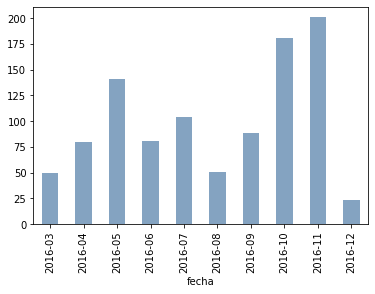

In [10]:
import matplotlib.pyplot as plt

ax = result.plot.bar(x='fecha', y='noticia', rot=90, color=(0.2, 0.4, 0.6, 0.6))

#### 4.3.2 Preprocesamientos básicos (spaCy)

In [11]:
dataset=texts.head(5)
dataset

,fecha,noticia
934,2016-03-05 01:18:32,El gobierno chino se ha fijado un objetivo de...
935,2016-03-05 03:20:09,Por “atentado en contra de la autoridad” fue ...
936,2016-03-05 04:40:10,La semana pasada tres millones de estudiantes...
937,2016-03-05 05:40:11,El virus del Zika presente en América Latina ...
938,2016-03-05 10:11:37,“Es como si la gente hubiera levantado una ro...


In [12]:
import spacy
nlp = spacy.load("es_core_news_sm")

noticias = []

for index,row in dataset.iterrows():
    noticia = []
    doc=nlp(row['noticia'].lower())
    for token in doc:
        if not token.is_stop and not token.is_punct and not token.is_digit and not token.like_num:
            noticia.append(token.lemma_)
    noticias.append(noticia)
    
print(noticias)

[[' ', 'gobernar', 'chino', 'fijar', 'objetivar', 'crecimiento', 'pib', 'y', 'ciento', 'frente', 'ciento', 'a', 'luz', 'ralentización', 'sufrir', 'economía', 'mundial', '\xa0 ', 'meter', 'figurar', 'informar', 'gubernamental', 'leer', 'ministro', 'li', 'keqiang', 'asamblea', 'nacional', 'popular', 'anp', 'legislativo', 'establecer', 'chino', 'año', 'lograr', 'cumplir', 'objetivar', 'crecimiento', '10', 'pib', 'aumentar', 'ciento', '\xa0 ', 'informar', 'fijo', 'indicador', 'inflación', 'mantener', 'tornar', 'ciento', 'ejercicio', 'anterior', 'creación', 'millón', 'puesto', 'urbano', 'frente', 'a', 'millón', 'generar', 'y', 'aumentar', 'presupuestar', 'defensa', 'ciento', 'año', '\xa0 ', 'perspectivo', 'necesidad', 'avanzar', 'reformar', 'estructural', 'y', 'ayudar', 'a', 'guiar', 'expectativa', 'mercar', 'y', 'mantenerlas', 'estable', 'señalar', 'informar', 'proyectar', 'crecimiento', 'pib', 'ciento', 'lustrar', 'aplicar', 'xiii', 'plan', 'quinquenal', '\xa0 ', 'cifrar', 'contrastar', '

In [13]:
noticias[2]

[' ',
 'semana',
 'millón',
 'estudiante',
 'ingresar',
 'a',
 'clase',
 'comenzar',
 'ciclar',
 'escolar',
 'mil',
 'niño',
 'y',
 'joven',
 'optar',
 'caminar',
 'estudiar',
 'y',
 'examen',
 'libre',
 '\xa0 ',
 'casar',
 'mariano',
 'parra',
 'colegiar',
 '3',
 'sentir',
 'escuela',
 'y',
 'querer',
 'formar',
 'gracia',
 'a',
 'gestión',
 'padre',
 'comenzar',
 'a',
 'estudiar',
 'a',
 'profesor',
 'particular',
 'temario',
 'entregar',
 'colegiar',
 'examinador',
 'prueba',
 'libre',
 'lograr',
 'terminar',
 'etapa',
 'escolar',
 'y',
 'entrar',
 'a',
 'estudiar',
 'ingeniería',
 'informático',
 'duoc',
 'formar',
 'programar',
 'estudiante',
 'inscribirse',
 'ministerio',
 'educación',
 'mineduc',
 'autorizar',
 'casar',
 'menor',
 'edad',
 'cartero',
 'asignar',
 'colegiar',
 'examinador',
 'preparar',
 'prueba',
 '\xa0 ',
 'jefe',
 'división',
 'educación',
 'mineduc',
 'gonzalo',
 'muñoz',
 '  ',
 'establecimiento',
 'educacional',
 'designar',
 'escoger',
 'preferentemente',


#### 4.3.3 Representación vectorial (Gensim): Bag of words (sin ponderación)

Gensim: https://radimrehurek.com/gensim/


In [14]:
from gensim import corpora

dictionary = corpora.Dictionary(noticias)
print(dictionary.token2id)
#asigna un id por cada palabra del vocabulario

{' ': 0, '10': 1, 'a': 2, 'afirmar': 3, 'alto': 4, 'alzar': 5, 'anp': 6, 'anterior': 7, 'anual': 8, 'aplicar': 9, 'aprobar': 10, 'asamblea': 11, 'aumentar': 12, 'avanzar': 13, 'ayudar': 14, 'año': 15, 'chino': 16, 'ciento': 17, 'cifrar': 18, 'complicar': 19, 'comunista': 20, 'contrastar': 21, 'creación': 22, 'crecimiento': 23, 'cumplir': 24, 'debatir': 25, 'defender': 26, 'defensa': 27, 'desarrollar': 28, 'década': 29, 'economía': 30, 'ejercicio': 31, 'equivaler': 32, 'estable': 33, 'establecer': 34, 'estructural': 35, 'expectativa': 36, 'figurar': 37, 'fijar': 38, 'fijo': 39, 'frente': 40, 'generar': 41, 'gobernar': 42, 'gubernamental': 43, 'guiar': 44, 'indicador': 45, 'inflación': 46, 'informar': 47, 'keqiang': 48, 'leer': 49, 'legislativo': 50, 'li': 51, 'lograr': 52, 'lustrar': 53, 'luz': 54, 'mantener': 55, 'mantenerlas': 56, 'marcar': 57, 'marzo': 58, 'mediar': 59, 'medir': 60, 'mercar': 61, 'meter': 62, 'millón': 63, 'ministro': 64, 'mundial': 65, 'nacional': 66, 'necesidad': 6

In [16]:
#transformamos el dataset en un representacion vectorial tipo bag of word
dataset_vectorized = [dictionary.doc2bow(noticia) for noticia in noticias]

In [17]:
print(dataset_vectorized[3])

[(0, 1), (2, 8), (14, 1), (28, 3), (51, 1), (65, 1), (68, 3), (71, 1), (95, 11), (96, 16), (102, 2), (111, 1), (146, 1), (154, 1), (182, 3), (186, 1), (196, 5), (202, 3), (210, 1), (211, 23), (224, 1), (254, 4), (255, 1), (261, 1), (269, 1), (298, 1), (300, 1), (316, 1), (317, 1), (318, 1), (319, 1), (320, 1), (321, 1), (322, 1), (323, 1), (324, 1), (325, 1), (326, 1), (327, 1), (328, 1), (329, 2), (330, 2), (331, 1), (332, 1), (333, 3), (334, 1), (335, 1), (336, 1), (337, 1), (338, 1), (339, 1), (340, 1), (341, 1), (342, 1), (343, 1), (344, 1), (345, 1), (346, 1), (347, 10), (348, 3), (349, 1), (350, 1), (351, 1), (352, 1), (353, 1), (354, 1), (355, 1), (356, 1), (357, 1), (358, 1), (359, 1), (360, 1), (361, 1), (362, 1), (363, 3), (364, 1), (365, 1), (366, 1), (367, 1), (368, 3), (369, 1), (370, 4), (371, 1), (372, 1), (373, 1), (374, 1), (375, 3), (376, 2), (377, 1), (378, 1), (379, 3), (380, 1), (381, 1), (382, 1), (383, 1), (384, 1), (385, 1), (386, 1), (387, 4), (388, 2), (389, 1

#### 4.3.4 Representación vectorial (Gensim): Bag of words (con ponderación TF-IDF)

In [18]:
#Convertir el BOW en una representación TF-IDF
from gensim import models
tfidf = models.TfidfModel(dataset_vectorized)

In [22]:
tfidf[dataset_vectorized][3]

[(14, 0.024765875947776374),
 (28, 0.04142040377269099),
 (51, 0.024765875947776374),
 (65, 0.024765875947776374),
 (68, 0.04142040377269099),
 (71, 0.013806801257563662),
 (96, 0.09649942435350073),
 (102, 0.04953175189555275),
 (111, 0.0060312140220937956),
 (146, 0.024765875947776374),
 (154, 0.024765875947776374),
 (182, 0.07429762784332912),
 (186, 0.013806801257563662),
 (196, 0.0690340062878183),
 (202, 0.04142040377269099),
 (210, 0.024765875947776374),
 (211, 0.31755642892396424),
 (224, 0.013806801257563662),
 (254, 0.0990635037911055),
 (255, 0.013806801257563662),
 (261, 0.024765875947776374),
 (269, 0.024765875947776374),
 (298, 0.024765875947776374),
 (300, 0.024765875947776374),
 (316, 0.04350053787345895),
 (317, 0.04350053787345895),
 (318, 0.024765875947776374),
 (319, 0.04350053787345895),
 (320, 0.04350053787345895),
 (321, 0.04350053787345895),
 (322, 0.04350053787345895),
 (323, 0.04350053787345895),
 (324, 0.04350053787345895),
 (325, 0.04350053787345895),
 (326,

### 5. Aplicación en Análisis de sentimientos 

Empezaremos importando las librerías que necesitaremos para esta tarea. Ya hemos importado spaCy, pero también necesitaremos pandas y scikit-learn.

In [23]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline

#### 5.1 Dataset
Vamos a usar un conjunto de datos real: un conjunto de reseñas de productos de Amazon Alexa. Este conjunto de datos viene como un archivo separado por tabulaciones (.tsv). Tiene cinco columnas: 
- __rating__: se refiere a la calificación que cada usuario dio a Alexa (de 0 a 5). 
- __fecha__: fecha de la reseña
- __variación__: describe el modelo de producto Alexa que el usuario comentó.
- __verified_reviews__: contiene el texto del comentario.
- __feedback__: contiene un label, 0 o 1, que indica el sentimiento general negativo (0) o positivo (1).

In [24]:
# Loading TSV file
df_amazon = pd.read_csv ("amazon_alexa.tsv", sep="\t")

In [25]:
# Top 5 records
df_amazon

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
5,5,31-Jul-18,Heather Gray Fabric,I received the echo as a gift. I needed anothe...,1
6,3,31-Jul-18,Sandstone Fabric,"Without having a cellphone, I cannot use many ...",1
7,5,31-Jul-18,Charcoal Fabric,I think this is the 5th one I've purchased. I'...,1
8,5,30-Jul-18,Heather Gray Fabric,looks great,1
9,5,30-Jul-18,Heather Gray Fabric,Love it! I’ve listened to songs I haven’t hear...,1


In [26]:
# shape of dataframe
df_amazon.shape

(3150, 5)

In [27]:
# View data information
df_amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
rating              3150 non-null int64
date                3150 non-null object
variation           3150 non-null object
verified_reviews    3150 non-null object
feedback            3150 non-null int64
dtypes: int64(2), object(3)
memory usage: 123.1+ KB


In [28]:
# Feedback Value count
df_amazon.feedback.value_counts()

1    2893
0     257
Name: feedback, dtype: int64

#### 5.2 Preprocesamientos y representación vectorial:

Crearemos una función personalizada <code>spacy_tokenizer()</code> que acepta una frase como entrada y la procesa en tokens, realizando lemmatización, minúsculas y eliminando palabras stop-words.

In [33]:
import spacy
import string
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English

# Create our list of punctuation marks
punctuations = string.punctuation

# Create our list of stopwords
stop_words=""

# Load English tokenizer, tagger, parser, NER and word vectors
parser = English()

# Creating our tokenizer function
def spacy_tokenizer(sentence):
    # Creating our token object, which is used to create documents with linguistic annotations.
    mytokens = parser(sentence)

    # Lemmatizing each token and converting each token into lowercase
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]

    # Removing stop words
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]

    # return preprocessed list of tokens
    return mytokens

#### Vectorización de los textos en BoW o TF-IDF, con scikit-learn

Podemos generar una matriz BoW para nuestros datos de texto usando la clase <code>CountVectorizer</code> de scikit-learn. En el código de abajo, le decimos a CountVectorizer que use la función personalizada spacy_tokenizer que construimos como su tokenizer, y que defina el rango de ngramo que queremos.

Los N-gramos son combinaciones de palabras adyacentes en un texto dado, donde _n_ es el número de palabras que se incluyen en las fichas. Por ejemplo, en la frase "¿Quién ganará la Copa del Mundo de fútbol en 2022? Bigramas sería una secuencia de dos palabras contiguas como "quién ganará", "ganará la", y así sucesivamente. Así que el parámetro ngram_range que usaremos en el código de abajo establece los límites inferior y superior de nuestros ngramas (usaremos unigramas). Entonces asignaremos los ngramas a bow_vector.

In [34]:
bow_vector = CountVectorizer(tokenizer = spacy_tokenizer, ngram_range=(1,1))
bow_vector

CountVectorizer(tokenizer=<function spacy_tokenizer at 0x7f4a0d030a70>)

Podriamos también transformar los textos en vectores para tener los pesos TF-IDF de cada palabra en cada documento:

In [35]:
tfidf_vector = TfidfVectorizer(tokenizer = spacy_tokenizer)

#### Partición de los datos en conjuntos de entrenamiento y test para entrenar y evaluar un modelo predictivo

Usaremos la mitad de nuestro conjunto de datos como nuestro conjunto de entrenamiento, que incluirá las respuestas correctas. Luego probaremos nuestro modelo usando la otra mitad del conjunto de datos sin darle las respuestas, para ver con qué precisión funciona.

Convenientemente, scikit-learn nos da una función incorporada para hacer esto: train_test_split(). Sólo necesitamos decirle el conjunto de características que queremos que se divida (X), las etiquetas contra las que queremos que se realice la prueba (ylabels), y el tamaño que queremos usar para el conjunto de pruebas (representado como un porcentaje en forma decimal).

In [36]:
from sklearn.model_selection import train_test_split

X = df_amazon['verified_reviews'] # the features we want to analyze
ylabels = df_amazon['feedback'] # the labels, or answers, we want to test against

X_train, X_test, y_train, y_test = train_test_split(X, ylabels, test_size=0.5)


#### Creación de un pipeline y generación del modelo

Es el momento de construir nuestro modelo predictivo. Empezaremos importando el módulo LogisticRegression y creando un objeto clasificador LogisticRegression.

__Para revisar sobre qué aprende y cómo aprendre el algorítmo de regresión logística: [slides](https://docs.google.com/presentation/d/11O3ud6ywHuaro6OemhyeH07nuJtdc4ybMuTJicnMnm8/edit?usp=sharing)__

Luego, crearemos un pipeline de procesamiento con dos componentes: un vectorizador y algoritmo de clasificación basado en la regresión logística. El vectorizador utiliza preprocesamientos (spacy) y vectorización (scikit-learn) para crear una matriz para representar nuestros textos.

Una vez que se construya este pipeline, se aprende el modelo predictivo llamando el método <code>fit()</code>.

In [37]:
# Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression
modelLR = LogisticRegression()

# Create pipeline using Bag of Words
pipe = Pipeline([('preprocessing', bow_vector),
                 ('regression-ML', modelLR)])

# model generation
pipe.fit(X_train,y_train)

Pipeline(steps=[('preprocessing',
                 CountVectorizer(tokenizer=<function spacy_tokenizer at 0x7f4a0d030a70>)),
                ('regression-ML', LogisticRegression())])

#### 5.3 Evaluación del modelo

Podemos evaluar el rendimiento de nuestro modelo usando el módulo de métricas de scikit-learn. Ahora que hemos entrenado nuestro modelo, pondremos nuestros datos de prueba a disposición para hacer predicciones. Luego usaremos varias funciones del módulo de métricas para ver la exactitud, precisión y recall de nuestro modelo.

In [38]:
from sklearn import metrics
# Predicting with a test dataset
predicted = pipe.predict(X_test)
print(predicted)

# Model Accuracy
print("Logistic Regression Accuracy:",metrics.accuracy_score(y_test, predicted))
print("Logistic Regression Precision:",metrics.precision_score(y_test, predicted))
print("Logistic Regression Recall:",metrics.recall_score(y_test, predicted))

[1 1 1 ... 1 1 1]
Logistic Regression Accuracy: 0.926984126984127
Logistic Regression Precision: 0.9382879893828799
Logistic Regression Recall: 0.9846796657381616


In [39]:
#Evaluación del rendimiento del clasificador
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, predicted)
print(confusion_matrix)
#Print de la matriz de confusión
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted))

[[  46   93]
 [  22 1414]]
              precision    recall  f1-score   support

           0       0.68      0.33      0.44       139
           1       0.94      0.98      0.96      1436

    accuracy                           0.93      1575
   macro avg       0.81      0.66      0.70      1575
weighted avg       0.92      0.93      0.92      1575



In [42]:
def printNMostInformative(vectorizer, model, N):
    feature_names = vectorizer.get_feature_names()
    coefs_with_fns = sorted(zip(model.coef_[0], feature_names))
    topClass1 = coefs_with_fns[:N]
    topClass2 = coefs_with_fns[:-(N + 1):-1]
    print("Class 1 best: ")
    for feat in topClass1:
        print(feat)
    print("Class 2 best: ")
    for feat in topClass2:
        print(feat)

In [43]:
printNMostInformative(bow_vector, modelLR, 20)

Class 1 best: 
(-1.523500918228262, 'not')
(-1.4895458665670425, 'cheap')
(-1.209826179658307, 'terrible')
(-1.0207365966052975, 'when')
(-0.9577452896567407, 'order')
(-0.9276789758069817, 'useless')
(-0.9012959935901782, 'after')
(-0.8881799706271553, 'return')
(-0.8827898726746258, 'no')
(-0.8475170799055632, 'difficult')
(-0.8459853835822712, 'apple')
(-0.8377438842152846, 'meh')
(-0.8337022081831309, 'twice')
(-0.7923554245400001, 'intrusive')
(-0.7767690207470604, 'stopped')
(-0.7766766749271931, 'returned')
(-0.7406681322876024, 'much')
(-0.7343765148322142, 'disconnects')
(-0.7290412942041861, 'often')
(-0.7185390114173066, 'spent')
Class 2 best: 
(2.0906839677153655, 'love')
(1.5934620981934158, 'great')
(1.2394830608287888, 'easy')
(0.9250544049039695, 'works')
(0.8672128880120398, 'but')
(0.8182692072977023, 'like')
(0.7543535892365358, 'fun')
(0.7513033163023595, 'good')
(0.6695625416659539, 'cool')
(0.6536625226090867, '...')
(0.6237753402684684, 'my')
(0.5963207629392794,

#### 6. Ejercicio: Análisis de sentimientos en español

Análisis de sentimientos de los tweets en español sobre aerolineas: Analizar cómo los viajeros expresaron sus sentimientos.


In [46]:
df = pd.read_csv('tweets_public.csv', encoding='utf-8', index_col='tweet_id')
df.head(5)

,airline_sentiment,is_reply,reply_count,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
tweet_id,,,,,,,,,
926419989107798016,neutral,False,0,0,Trabajar en #Ryanair como #TMA: https://t.co/r...,NaN,Fri Nov 03 12:05:12 +0000 2017,NaN,Madrid
934854385577943041,neutral,True,0,0,@Iberia @FIONAFERRER Cuando gusten en Cancún s...,NaN,Sun Nov 26 18:40:28 +0000 2017,NaN,Mexico City
945318406441635840,negative,False,0,0,Sabiais que @Iberia te trata muy bien en santi...,NaN,Mon Dec 25 15:40:45 +0000 2017,NaN,Madrid
927540721296568320,negative,False,0,0,NUNCA NUNCA NUNCA pidáis el café de Ryanair.\n...,NaN,Mon Nov 06 14:18:35 +0000 2017,NaN,Pacific Time (US & Canada)
947965901332197376,positive,True,0,0,@cris_tortu @dakar @Iberia @Mitsubishi_ES @BFG...,NaN,Mon Jan 01 23:00:57 +0000 2018,NaN,Buenos Aires
